In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Movie Metadata 

In [2]:
movies_metadata = pd.read_csv("movies_metadata.csv.zip", compression='zip')

In [3]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movies_metadata.shape

(45383, 24)

In [5]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45383 entries, 0 to 45382
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45383 non-null  bool   
 1   belongs_to_collection  4486 non-null   object 
 2   budget                 45383 non-null  int64  
 3   genres                 45383 non-null  object 
 4   homepage               7765 non-null   object 
 5   id                     45383 non-null  int64  
 6   imdb_id                45383 non-null  object 
 7   original_language      45372 non-null  object 
 8   original_title         45383 non-null  object 
 9   overview               44433 non-null  object 
 10  popularity             45380 non-null  float64
 11  poster_path            45005 non-null  object 
 12  production_companies   45380 non-null  object 
 13  production_countries   45380 non-null  object 
 14  release_date           45302 non-null  object 
 15  re

In [6]:
#remove missing values
# drop columns homepage, belongs_to_collection
# Question -> show we also drop tagline column? 
movies_metadata = movies_metadata.drop(['adult','imdb_id','original_title','homepage', 'belongs_to_collection', 'tagline', 'overview', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'video'], axis=1)
movies_metadata

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,en,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2,en,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",3,en,11.712900,1995-12-22,0.0,101.0,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,en,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",5,en,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45378,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",176269,fa,0.072051,NaN,0.0,90.0,4.0,1.0
45379,0,"[{'id': 18, 'name': 'Drama'}]",176271,tl,0.178241,2011-11-17,0.0,360.0,9.0,3.0
45380,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",176273,en,0.903007,2003-08-01,0.0,90.0,3.8,6.0
45381,0,[],176275,en,0.003503,1917-10-21,0.0,87.0,0.0,0.0


In [7]:
movies_metadata.release_date = pd.to_datetime(movies_metadata.release_date)

In [8]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45383 entries, 0 to 45382
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45383 non-null  int64         
 1   genres             45383 non-null  object        
 2   id                 45383 non-null  int64         
 3   original_language  45372 non-null  object        
 4   popularity         45380 non-null  float64       
 5   release_date       45302 non-null  datetime64[ns]
 6   revenue            45380 non-null  float64       
 7   runtime            45125 non-null  float64       
 8   vote_average       45380 non-null  float64       
 9   vote_count         45380 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 3.5+ MB


In [9]:
movies_metadata.isna().sum()

budget                 0
genres                 0
id                     0
original_language     11
popularity             3
release_date          81
revenue                3
runtime              258
vote_average           3
vote_count             3
dtype: int64

<AxesSubplot: xlabel='index'>

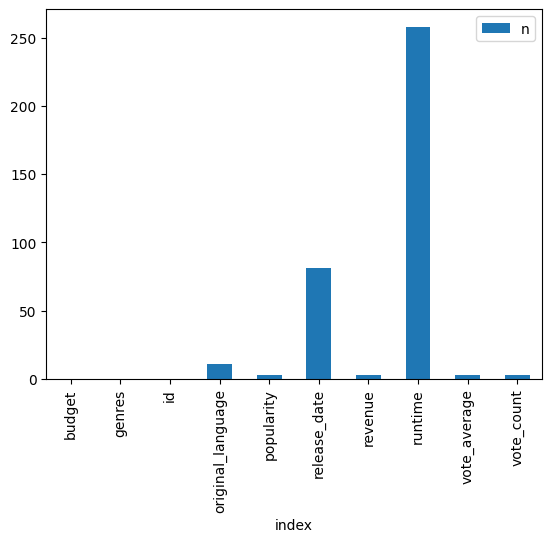

In [10]:
movies_metadata.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90)


In [11]:
column_name_num = list(movies_metadata.select_dtypes(include=[np.number]))
column_name_num

['budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count']

In [12]:
#fill the missing values in popularity, vote_average, runtime, revenue, vote_count with the mean value
popularity_mean = movies_metadata.popularity.mean()
vote_average_mean = movies_metadata.vote_average.mean()
runtime_mean = movies_metadata.runtime.mean()
revenue_mean = movies_metadata.revenue.mean()
vote_count_mean = movies_metadata.vote_count.mean()

movies_metadata.popularity.fillna(value=popularity_mean, inplace=True)
movies_metadata.vote_average.fillna(value=vote_average_mean, inplace=True)
movies_metadata.runtime.fillna(value=runtime_mean, inplace=True)
movies_metadata.revenue.fillna(value=revenue_mean, inplace=True)
movies_metadata.vote_count.fillna(value=vote_count_mean, inplace=True)

In [13]:
movies_metadata.isna().sum() 

budget                0
genres                0
id                    0
original_language    11
popularity            0
release_date         81
revenue               0
runtime               0
vote_average          0
vote_count            0
dtype: int64

In [14]:
#find the percentage of missing values in all columns
movies_metadata.isnull().mean() * 100

# as all the other columns' missing data are less than 5% we can ignore them

budget               0.000000
genres               0.000000
id                   0.000000
original_language    0.024238
popularity           0.000000
release_date         0.178481
revenue              0.000000
runtime              0.000000
vote_average         0.000000
vote_count           0.000000
dtype: float64

#### Reset index from removing data

In [15]:
movies_metadata = movies_metadata.reset_index(drop=True)
movies_metadata.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,en,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2,en,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",3,en,11.712900,1995-12-22,0.0,101.0,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,en,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",5,en,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0


### Create an array of all the genres in genres columns  

In [18]:
for i in range(len(movies_metadata.genres)):
    genres_list = []
    genres = eval(movies_metadata.genres[i])
    for key, value in [(key, value) for x in genres for (key, value) in x.items()]:
        if key == "name":
            genres_list.append(value)
#     print(genres_list)
    movies_metadata.at[i, 'new_genres'] = (genres_list)

In [19]:
movies_metadata.new_genres

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45378                 [Drama, Family]
45379                         [Drama]
45380       [Action, Drama, Thriller]
45381                              []
45382                              []
Name: new_genres, Length: 45383, dtype: object

In [20]:
# find the number of rows that have []
movies_metadata.new_genres = movies_metadata.new_genres.apply(lambda y: np.nan if y==[] else y)

In [21]:
movies_metadata

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,new_genres
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,en,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,"[Animation, Comedy, Family]"
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2,en,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",3,en,11.712900,1995-12-22,0.0,101.0,6.5,92.0,"[Romance, Comedy]"
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,en,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,"[Comedy, Drama, Romance]"
4,0,"[{'id': 35, 'name': 'Comedy'}]",5,en,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...
45378,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",176269,fa,0.072051,NaT,0.0,90.0,4.0,1.0,"[Drama, Family]"
45379,0,"[{'id': 18, 'name': 'Drama'}]",176271,tl,0.178241,2011-11-17,0.0,360.0,9.0,3.0,[Drama]
45380,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",176273,en,0.903007,2003-08-01,0.0,90.0,3.8,6.0,"[Action, Drama, Thriller]"
45381,0,[],176275,en,0.003503,1917-10-21,0.0,87.0,0.0,0.0,NaN


In [22]:
# drop column genre
movies_metadata = movies_metadata.drop(['genres'], axis=1)

In [23]:
movies_metadata.head()

,budget,id,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,new_genres
0,30000000,1,en,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,"[Animation, Comedy, Family]"
1,65000000,2,en,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,0,3,en,11.712900,1995-12-22,0.0,101.0,6.5,92.0,"[Romance, Comedy]"
3,16000000,4,en,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,"[Comedy, Drama, Romance]"
4,0,5,en,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0,[Comedy]


In [24]:
# number of null values in genres
movies_metadata.new_genres.isnull().sum()

2433

In [25]:
movies_metadata = movies_metadata.dropna().reset_index(drop=True)

In [26]:
movies_metadata

,budget,id,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,new_genres
0,30000000,1,en,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,"[Animation, Comedy, Family]"
1,65000000,2,en,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,0,3,en,11.712900,1995-12-22,0.0,101.0,6.5,92.0,"[Romance, Comedy]"
3,16000000,4,en,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,"[Comedy, Drama, Romance]"
4,0,5,en,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0,[Comedy]
...,...,...,...,...,...,...,...,...,...,...
42910,0,176259,en,0.386450,2000-10-03,0.0,30.0,7.0,1.0,[Horror]
42911,0,176263,en,0.661558,1995-01-01,0.0,85.0,3.5,1.0,[Science Fiction]
42912,0,176267,en,5.683753,1991-05-13,0.0,104.0,5.7,26.0,"[Drama, Action, Romance]"
42913,0,176271,tl,0.178241,2011-11-17,0.0,360.0,9.0,3.0,[Drama]


In [27]:
movies_metadata.isnull().mean()


budget               0.0
id                   0.0
original_language    0.0
popularity           0.0
release_date         0.0
revenue              0.0
runtime              0.0
vote_average         0.0
vote_count           0.0
new_genres           0.0
dtype: float64

### Multilabel Binerizer in genres columns

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movies_metadata.new_genres)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [29]:
genres = list(mlb.classes_)
genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [30]:
movie_genres = pd.DataFrame(mlb.fit_transform(movies_metadata.new_genres), columns=mlb.classes_)

In [31]:
movie_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
movie_genres.shape

(42915, 20)

In [33]:
genre_freq = movie_genres.sum(axis=0)
genre_freq

Action              6580
Adventure           3487
Animation           1922
Comedy             13165
Crime               4299
Documentary         3907
Drama              20216
Family              2765
Fantasy             2309
Foreign             1613
History             1394
Horror              4665
Music               1593
Mystery             2462
Romance             6719
Science Fiction     3039
TV Movie             765
Thriller            7608
War                 1321
Western             1040
dtype: int64

<AxesSubplot: title={'center': 'Frequency of each movie genres'}>

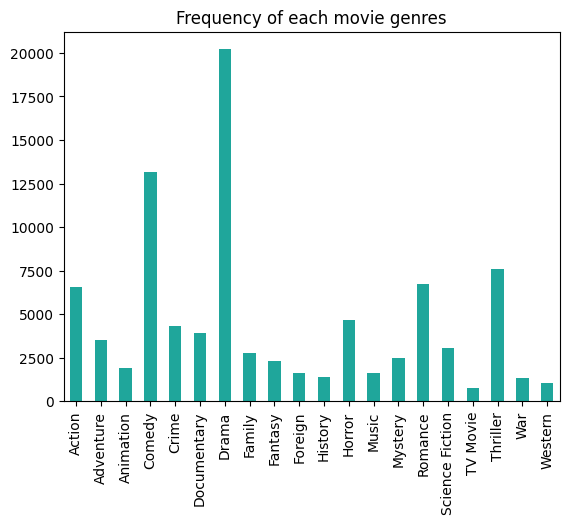

In [34]:
genre_freq.plot(kind='bar', color='#1fa69b', title="Frequency of each movie genres")

In [35]:
# movies_metadata and movie_genres dfs have the same number of rows
movies_metadata.shape[0] == movie_genres.shape[0]

True

In [36]:
# drop new_genres column
movies_metadata = movies_metadata.drop(['new_genres'], axis=1)

### Plot revenue 

<AxesSubplot: ylabel='Density'>

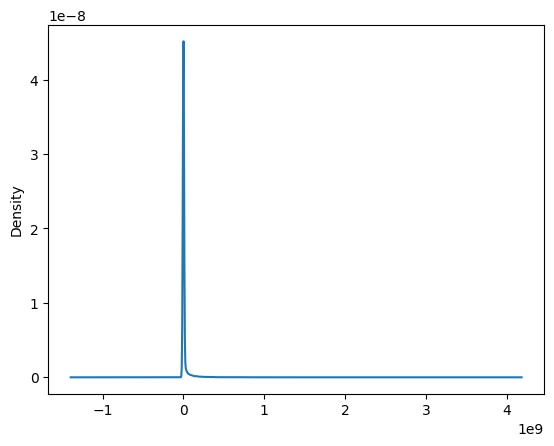

In [37]:
movies_metadata.revenue.plot(kind='kde')

In [38]:
# drop revenue column -> most columns are null
movies_metadata = movies_metadata.drop(['revenue'], axis=1)

In [39]:
movies_metadata

,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count
0,30000000,1,en,21.946943,1995-10-30,81.0,7.7,5415.0
1,65000000,2,en,17.015539,1995-12-15,104.0,6.9,2413.0
2,0,3,en,11.712900,1995-12-22,101.0,6.5,92.0
3,16000000,4,en,3.859495,1995-12-22,127.0,6.1,34.0
4,0,5,en,8.387519,1995-02-10,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...
42910,0,176259,en,0.386450,2000-10-03,30.0,7.0,1.0
42911,0,176263,en,0.661558,1995-01-01,85.0,3.5,1.0
42912,0,176267,en,5.683753,1991-05-13,104.0,5.7,26.0
42913,0,176271,tl,0.178241,2011-11-17,360.0,9.0,3.0


### Plot popularity column 

<AxesSubplot: ylabel='Density'>

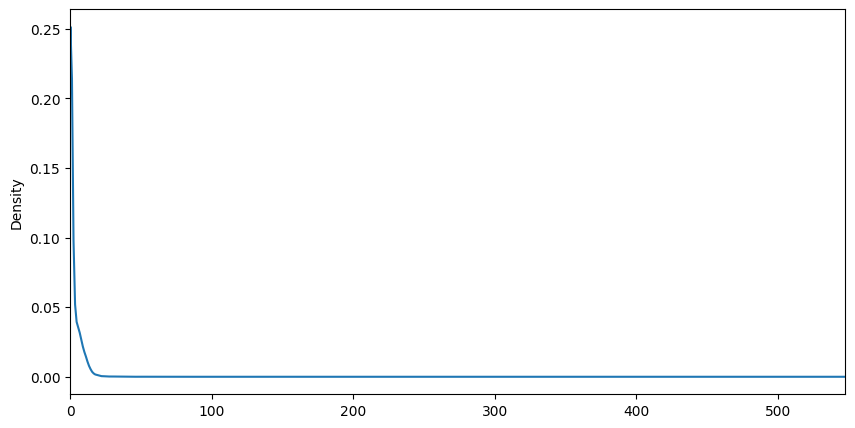

In [40]:
movies_metadata.popularity.plot(kind='kde', figsize=(10, 5), xlim=(movies_metadata.popularity.min(), movies_metadata.popularity.max())
                               )

In [41]:
movies_metadata.popularity.max()

547.488298

In [42]:
movies_metadata.popularity.min()

0.0

In [43]:
movies_metadata.popularity.mean()

3.0753820061050914

In [44]:
#check how many values are exactly 0 -> not many only 21 rows 
movies_metadata.popularity[movies_metadata['popularity'] > 0].count()

42894

In [45]:
movies_metadata.popularity[movies_metadata['popularity'] < 4].count()

32126

The above grpah shows that the majority of movies are not popular, however a little number of movies are really popular

### One hot encode original_language

In [47]:
one_hot_lang = pd.get_dummies(movies_metadata['original_language'], prefix="lang_")
one_hot_lang

,lang__ab,lang__af,lang__am,lang__ar,lang__ay,lang__bg,lang__bm,lang__bn,lang__bo,lang__bs,...,lang__tl,lang__tr,lang__uk,lang__ur,lang__uz,lang__vi,lang__wo,lang__xx,lang__zh,lang__zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42913,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Concatinate movies_metadata and movie_genres


In [48]:
movie_meta_final = pd.concat([movies_metadata, movie_genres, one_hot_lang], axis=1)
movie_meta_final.head()

,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count,Action,Adventure,...,lang__tl,lang__tr,lang__uk,lang__ur,lang__uz,lang__vi,lang__wo,lang__xx,lang__zh,lang__zu
0,30000000,1,en,21.946943,1995-10-30,81.0,7.7,5415.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,2,en,17.015539,1995-12-15,104.0,6.9,2413.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,3,en,11.712900,1995-12-22,101.0,6.5,92.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,4,en,3.859495,1995-12-22,127.0,6.1,34.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,en,8.387519,1995-02-10,106.0,5.7,173.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
movie_meta_final.shape

(42915, 117)

### Import train dataset

In [52]:
train = pd.read_csv("train.csv")

In [53]:
train.shape

(70002, 2)

In [54]:
train.head()

,userId_movieId,rating
0,10_1358,0.4
1,237_1544,0.7
2,54_373,1.0
3,11_2053,0.8
4,183_2524,0.6


In [55]:
#split "userId_movieId" column to two 'userId', 'id' = movie_Id'
train[['userId', 'id']] = train["userId_movieId"].apply(lambda x: pd.Series(str(x).split("_")))
train = train.drop('userId_movieId', axis=1)
train.head()

,rating,userId,id
0,0.4,10,1358
1,0.7,237,1544
2,1.0,54,373
3,0.8,11,2053
4,0.6,183,2524


In [56]:
# cast user_Id and id into int64 
train.userId = train.userId.astype(np.int64)
train.id = train.id.astype(np.int64)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70002 entries, 0 to 70001
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  70002 non-null  float64
 1   userId  70002 non-null  int64  
 2   id      70002 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.6 MB


### Merge movies_metadata and movie_genres dfs in one

In [148]:
all_data = pd.merge(train, movie_meta_final, on="id")

In [149]:
#drop original lang column
all_data = all_data.drop('original_language', axis=1)

In [150]:
all_data.head()

,rating,userId,id,budget,popularity,release_date,runtime,vote_average,vote_count,Action,...,lang__tl,lang__tr,lang__uk,lang__ur,lang__uz,lang__vi,lang__wo,lang__xx,lang__zh,lang__zu
0,0.4,10,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.6,307,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.9,456,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.8,112,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.8,624,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
all_data.shape

(69803, 118)

In [152]:
#name id column as movieId instead
all_data = all_data.rename(columns={"id": "movieId"})

In [153]:
all_data.head()

,rating,userId,movieId,budget,popularity,release_date,runtime,vote_average,vote_count,Action,...,lang__tl,lang__tr,lang__uk,lang__ur,lang__uz,lang__vi,lang__wo,lang__xx,lang__zh,lang__zu
0,0.4,10,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.6,307,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.9,456,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.8,112,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.8,624,1358,1000000,9.475693,1996-08-30,135.0,7.4,236.0,0,...,0,0,0,0,0,0,0,0,0,0


### Segment the release date into 70s, 80s, 90s etc... 

In [182]:
all_data['year'] = all_data.release_date.dt.strftime('%Y')

In [185]:
all_data = all_data.drop(['release_date'], axis=1)

In [188]:
all_data.year = all_data.year.astype(np.int64)

<AxesSubplot: title={'center': 'Histogram of the years each movie was released'}, ylabel='Frequency'>

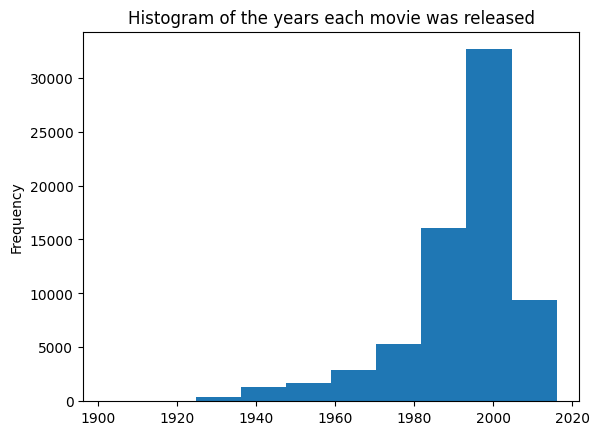

In [190]:
all_data.year.plot(kind='hist', title="Histogram of the years each movie was released")

In [199]:
all_data

,rating,userId,movieId,budget,popularity,runtime,vote_average,vote_count,Action,Adventure,...,lang__tr,lang__uk,lang__ur,lang__uz,lang__vi,lang__wo,lang__xx,lang__zh,lang__zu,year
0,0.333333,10,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
1,0.555556,307,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
2,0.888889,456,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
3,0.777778,112,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
4,0.777778,624,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69798,0.333333,305,26487,0.000000,0.007524,0.090351,0.61,0.001350,0,0,...,0,0,0,0,0,0,0,0,0,1983
69799,0.777778,8,6509,0.000342,0.010695,0.081579,0.75,0.005258,0,0,...,0,0,0,0,0,0,0,0,0,1974
69800,0.777778,464,77414,0.000000,0.010121,0.093860,0.70,0.068135,0,0,...,0,0,0,0,0,0,0,0,0,2010
69801,0.666667,469,79251,0.000000,0.019054,0.091228,0.55,0.028988,0,0,...,0,0,0,0,0,0,0,0,0,2010


### Find the correlation between values and rating

In [200]:
#find correlation
correlation = all_data.corr(method='spearman')['rating'][1:]

In [201]:
correlation.isna().sum()

51

In [202]:
# drop columns with NaN correlation
nan_corr_col_idx = []
for i, val in enumerate(correlation.isna()):
    if val == True:
        nan_corr_col_idx.append(i)
nan_corr_col_idx       

[27,
 29,
 30,
 31,
 32,
 33,
 35,
 37,
 40,
 45,
 48,
 52,
 53,
 56,
 58,
 62,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 86,
 90,
 93,
 94,
 95,
 97,
 98,
 99,
 102,
 103,
 104,
 106,
 108,
 109,
 110,
 112,
 115]

In [203]:
len(nan_corr_col_idx)

51

In [204]:
all_data_reduced = all_data.drop(all_data.columns[nan_corr_col_idx],axis = 1)
all_data_reduced.head()

,rating,userId,movieId,budget,popularity,runtime,vote_average,vote_count,Action,Adventure,...,lang__si,lang__sq,lang__sr,lang__tg,lang__tl,lang__uz,lang__wo,lang__xx,lang__zu,year
0,0.333333,10,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
1,0.555556,307,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
2,0.888889,456,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
3,0.777778,112,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
4,0.777778,624,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996


### Apply PCA to reduce the dimentionality of the data

In [205]:
all_data.head()

,rating,userId,movieId,budget,popularity,runtime,vote_average,vote_count,Action,Adventure,...,lang__tr,lang__uk,lang__ur,lang__uz,lang__vi,lang__wo,lang__xx,lang__zh,lang__zu,year
0,0.333333,10,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
1,0.555556,307,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
2,0.888889,456,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
3,0.777778,112,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
4,0.777778,624,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996


In [206]:
# first find the number of components using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_data[['rating','budget','popularity', 'runtime', 'runtime', 'vote_average', 'vote_count']] = scaler.fit_transform(all_data[['rating','budget','popularity', 'runtime', 'runtime', 'vote_average', 'vote_count']])


In [207]:
all_data.head()

,rating,userId,movieId,budget,popularity,runtime,vote_average,vote_count,Action,Adventure,...,lang__tr,lang__uk,lang__ur,lang__uz,lang__vi,lang__wo,lang__xx,lang__zh,lang__zu,year
0,0.333333,10,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
1,0.555556,307,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
2,0.888889,456,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
3,0.777778,112,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996
4,0.777778,624,1358,0.002632,0.017308,0.118421,0.74,0.016767,0,0,...,0,0,0,0,0,0,0,0,0,1996


In [208]:
# 95% or 99% of variance 
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(all_data)
all_data_pca = pca.transform(all_data)


In [209]:
all_data_pca

array([[-11055.7477918 ],
       [-11055.5906916 ],
       [-11055.51187707],
       ...,
       [ 65000.48284294],
       [ 66837.48517516],
       [ 33573.39838936]])

In [212]:
# convert all_data_pca into dataframe
data_pca = pd.DataFrame(all_data_pca)
 
data_pca.head()

,0
0,-11055.747792
1,-11055.590692
2,-11055.511877
3,-11055.693838
4,-11055.423012


In [213]:
#export pca 
compression_opts = dict(method='zip',
                        archive_name='data_pca.csv')  
data_pca.to_csv('data_pca.zip',
          compression=compression_opts)  